In [41]:
### DESCLAIMER ##
#you might found some error when running this notebook. probably that because some library is not match with your environment
#to solve error raised , you might install some library below


#!pip install pipelinehelper
#!pip install scikit-learn==0.24.1
#!pip install git+git://github.com/rasbt/mlxtend.git  #egg=mlxtend
#!pip install joblib


# Step 2 : Music Genre Prediction
---


## Introduction
Author : Hafidzati Hikmadani <br>
<br>
<br>

## Dataset

At previous, we've processed the dataset of 2017 songs spotify and labeled each of its song with Genre of songs we've created based on clustering processing.

Now, from those proccesed dataset, we could do some further step and use it for any purpose such as classification or else. 

You could access dataset from our previous notebook (Unsupervised Learning) with filename __trainCluster.csv.__ This data is contain a songs from spotify which has been collected with it's own songs attributes.
<br>
<br>

## Attribute Information:

| Attributes | Description |
| -: | :- |
| acousticness   | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability  | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| duration_ms | The duration of the track in milliseconds. |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| mode  | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| speechiness  | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time_signature  | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |
| valence  | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| target  | Wether author like or not |
| song_title  | The songs title |
| artist  | The singer/artist of songs |
| Genre | Genre of songs (0 : Megalof Earing, 1: Eugenis Earing, 2: Koivos Earing) |


<br>
<br>

## Goals

1. Portion of Genre in dataset?
2. How is trend of acousticness between 3 Genre?
3. Does Eugenis Genre mostly has low valence? 
4. Create a classification of songs based on its songs attributes.


## Import Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import mlxtend

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline, FeatureUnion
from mlxtend.feature_selection import ColumnSelector

from pipelinehelper import PipelineHelper
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

## Data Loading

In [43]:
#Load Data
data = pd.read_csv("dataset/trainCluster.csv").reset_index(drop=True)
data.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,Genre
0,0.183,0.716,576888,0.957,0.058000,3,0.182,-4.814,1,0.0689,106.714,4.0,0.930,Odofo Nyi Akyiri Biara,Ebo Taylor,0
1,0.827,0.583,248213,0.776,0.000038,3,0.298,-5.293,1,0.0661,126.536,4.0,0.782,Bang! Bang!,Joe Cuba,0


Same with previous attributes, but in this stage we've already has new attributes called "Genre".

In [44]:
#data shape
data.shape

(1815, 16)

We have 1.815 data with 16 attributes.

In [45]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1815 non-null   float64
 1   danceability      1815 non-null   float64
 2   duration_ms       1815 non-null   int64  
 3   energy            1815 non-null   float64
 4   instrumentalness  1815 non-null   float64
 5   key               1815 non-null   int64  
 6   liveness          1815 non-null   float64
 7   loudness          1815 non-null   float64
 8   mode              1815 non-null   int64  
 9   speechiness       1815 non-null   float64
 10  tempo             1815 non-null   float64
 11  time_signature    1815 non-null   float64
 12  valence           1815 non-null   float64
 13  song_title        1815 non-null   object 
 14  artist            1815 non-null   object 
 15  Genre             1815 non-null   int64  
dtypes: float64(10), int64(4), object(2)
memory

We have 14 numeric attributes and 2 object attributes. Our target value is attribute Genre, and the rest will be come features.

## Data Cleaning

Eventhough we've been process the same data before in clustering, but let's run through Cleaning Process one more to make sure our data is completely ok.

In [46]:
#Copy data
df = data.copy()

### Handling Missing Values

In [47]:
#check missing values 
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
Genre               0
dtype: int64

We dont have any missing values,if there is any we will drop it off.

## Data Visualization

In [48]:
#Split numeric and categoric feature
num_df = df[["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]]
cat_df = df[["song_title","artist","key","mode","time_signature","Genre"]]

### Distribution of Numeric Data

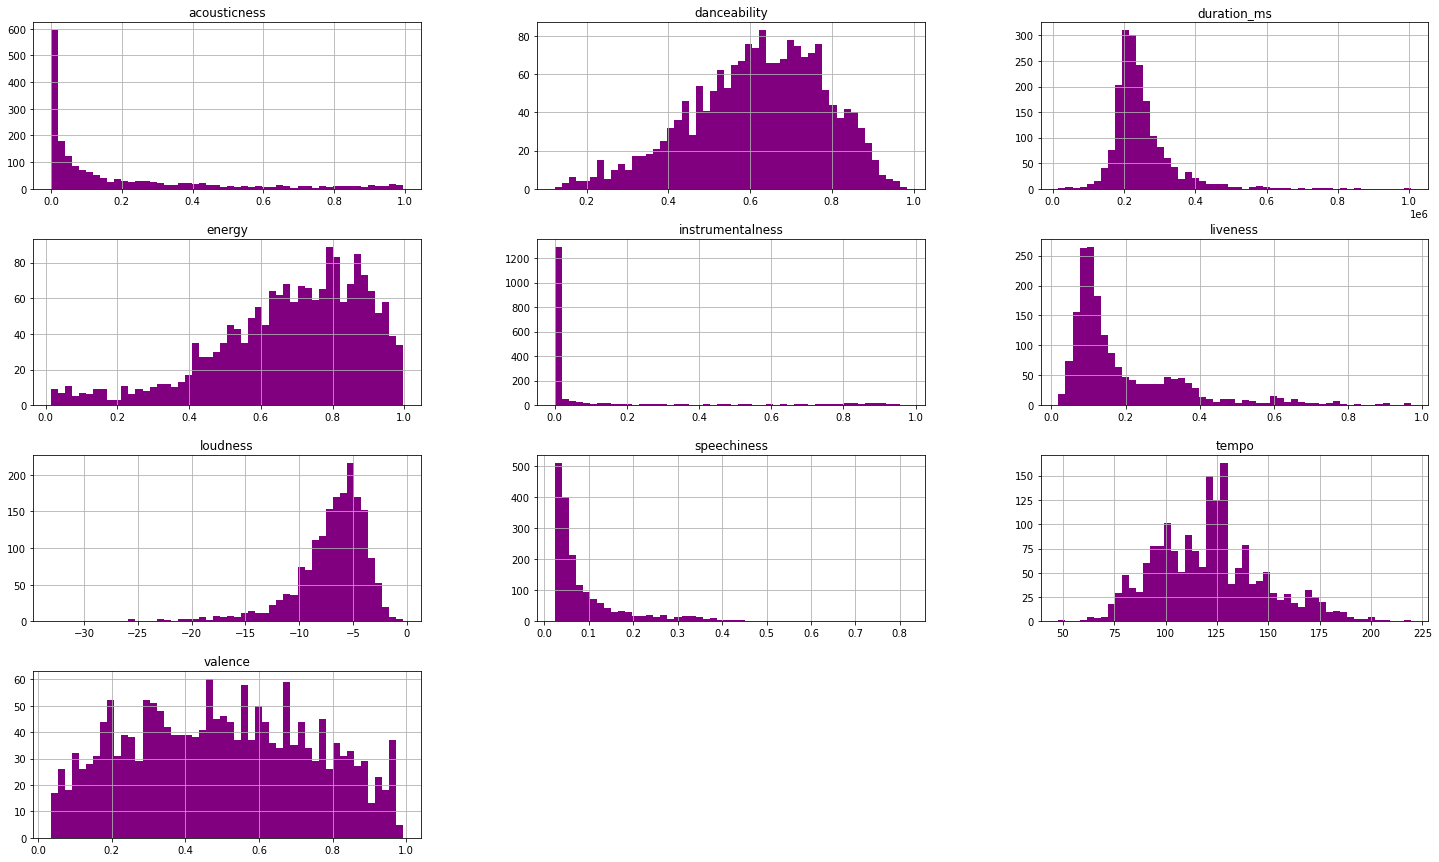

In [49]:
#Graph
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(25,15));
ax = fig.gca();
num_df.hist(bins=50, ax=ax, color="purple")
plt.show()

We could see the distribution of numeric attributes of dataset mostly look alike normal distribution with some skewed.

Looking at the attributes with longs skweed such as Acousticness, instrumentalness, speechiness, liveness, it might have outlier because the range between median to maximum / minimum value is pretty far. But recalling the description of dataset, those maximum and minimum values of attributes are still in the normal range which -60 - 0 for loudness and 0-1 for the rest. So we could assume those data are valid and not outlier.

### Distribution of Categoric Data

Let's check the cardinality of categoric dataset.

Total data row : 1815

Total cardinality  song_title  :  1763
Total cardinality  artist  :  1233
Total cardinality  key  :  12
Total cardinality  mode  :  2
Total cardinality  time_signature  :  4
Total cardinality  Genre  :  3


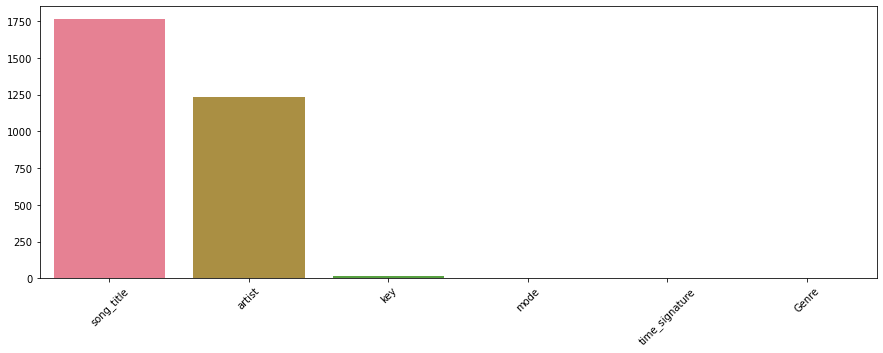

In [50]:
#Check Cardinality of Categorical Attributes
print("Total data row :", df.shape[0])
print("")
cr =[]
for i in cat_df.columns :
    c = len(df[i].unique())
    print("Total cardinality ",i," : ", c)
    cr.append(c)

#Graph
plt.figure(figsize=(15,5))
sns.barplot(x=[x for x in cat_df.columns], y=cr, palette="husl")
plt.xticks(rotation=45)
plt.show()


We could see song_title and artist has high cardinality in dataset , more than a half of dataset. Means it's attributes can't be used for our next modeling.

While key , mode, Genre and time_signature has pretty low cardinality to be considered for next model.

### Others Visualization

__Portion of Genre in dataset?__

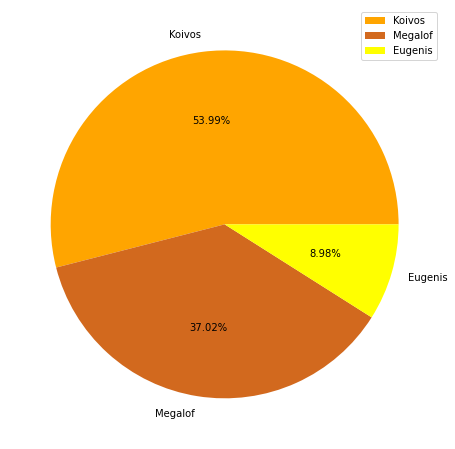

In [51]:
#Query
q1 = df.groupby("Genre")["song_title"].count().reset_index()

#Graph
plt.figure(figsize=(10,8))
plt.pie(q1["song_title"], labels=["Koivos","Megalof","Eugenis"], autopct='%.2f%%', explode=[0,0,0], colors =["orange", "chocolate" , "yellow"])
plt.legend(q1["song_title"], labels=["Koivos","Megalof","Eugenis"])
plt.show()


We could see, from our a half of dataset mostly songs has Koivos genre which mean a common song such as pop. While strong genre song (Megalof) has 37% from data and the rest are Eugenis which has calm vibes for ear.

__How is trend of acousticness between 3 Genre?__

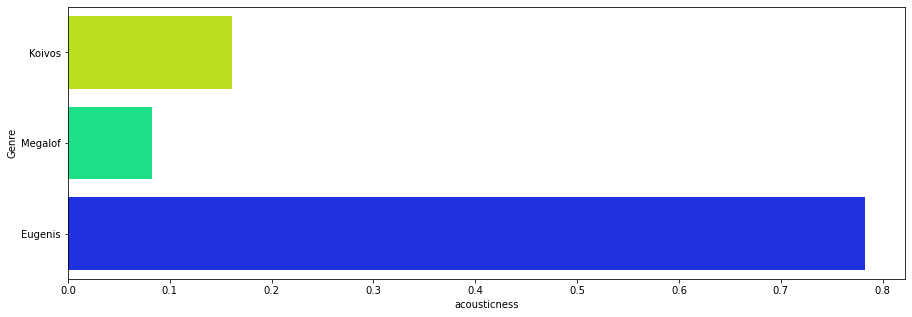

In [52]:
#Query
q2 = df.groupby("Genre")["acousticness"].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data=q2 , x="acousticness" , y="Genre", orient="h" , palette="gist_rainbow")
plt.yticks([0,1,2],["Koivos","Megalof","Eugenis"])
plt.show()

We could see, Eugenis has highest average of acousticness while megalof is the lowest. It was inline since eugenis typically has calm music such as jazz and megalof has hard music such as rock or EDM.

__Does Eugenis Genre mostly has low valence?__




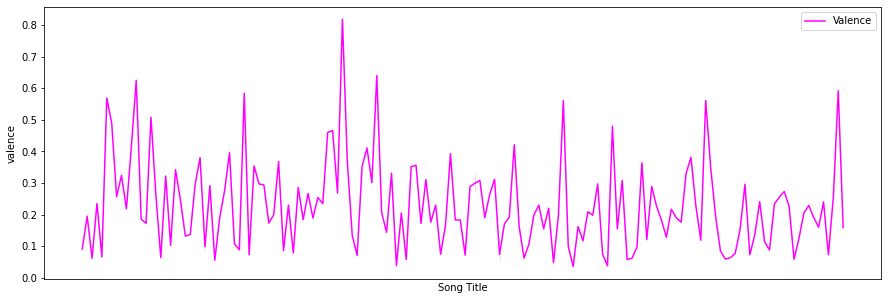

In [53]:
#Query
q3 = df[df["Genre"] == 2]

#Graph
plt.figure(figsize=(15,5))
sns.lineplot(x=q3["song_title"], y= q3["valence"], label="Valence", color="magenta")
plt.xticks([])
plt.xlabel("Song Title")
plt.show()

From dataset, high valence indicates the song with positive sound such happy, cheerful or euphoric. From above graph, we could see the trend of valene from Eugenis Genre not always has low valence. There is song with high valence reached 0.8. It means Eugenis Genre not always has low valence, sometimes it could have high valence. It might have calm or slow rythm but it could be positive or happy.

## Data Preprocessing

In this data preprocessing we're going to do some activites such as  :
1. Feature Selection & train_split if needed
2. Creating pipeline preprocessing

In [54]:
# to make this notebook's output identical at every run
np.random.seed(42)

### Feature Selection

For feature selection, we will divide it into 2 group :
1. We will use SelectKBest with ANNOVA approach between numerical features with target variable.
2. We will use SelectKBest with chi2 square approach to find out correlation between categorical features with target variable

Our target data is Genre which represents which genre the song is included.

In [55]:
#Split numeric and categoric feature
num_df = df[["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]]
cat_df = df[["song_title","artist","key","mode","time_signature"]]

#### Numerical Features

We will use Annova Approach for selecting numerical features. We will use alpha = 0.05

- H0 : Variance of each genre in feature are same
- H1 : Variance of each genre in featurea are different 

P-Value of Feature acousticness : 0.0000000 
P-Value of Feature danceability : 0.0000000 
P-Value of Feature duration_ms : 0.0000000 
P-Value of Feature energy : 0.0000000 
P-Value of Feature instrumentalness : 0.0000000 
P-Value of Feature liveness : 0.0000000 
P-Value of Feature loudness : 0.0000000 
P-Value of Feature speechiness : 0.0000000 
P-Value of Feature tempo : 0.0000000 
P-Value of Feature valence : 0.0000000 



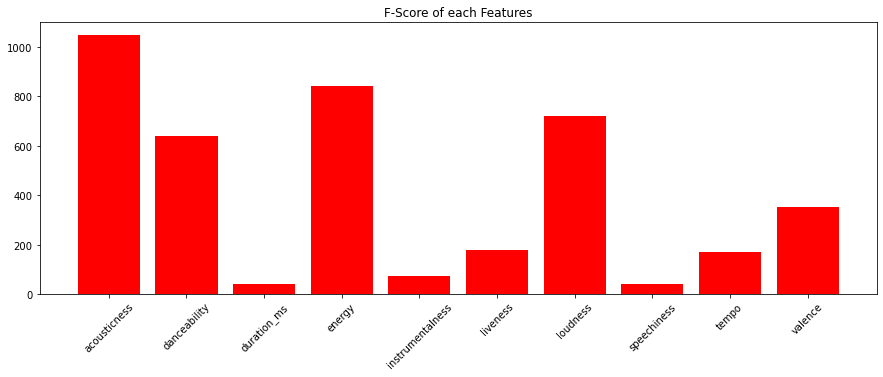

In [56]:
#Scaling the numerical features
sc = StandardScaler()
num_dfs = sc.fit_transform(num_df)

#Define Feature Selection with ANNOVA approach
fs_num = SelectKBest(score_func=f_classif, k='all')

#Apply numerical feature selection to Training Data
X_features_num = fs_num.fit_transform(num_dfs, df["Genre"])
fs_num.scores_

#what are scores for the features
for col in list(num_df.columns):
  score = fs_num.pvalues_[num_df.columns.get_loc(col)]
  print("P-Value of Feature %s : %.7f " %(col , score))
print("")

#barplot
plt.figure(figsize=(15,5))
plt.bar([col for col in list(num_df.columns)], fs_num.scores_ , color="red")
plt.xticks(rotation=45)
plt.title("F-Score of each Features")
plt.show()


Above result, represent all features has P-Values below our alpha . It means variance of genre in all features are different , we could say reject H0.

The F-Score of each features are vary. It's representing that each Genre of each features has its own variance and divide well. 

So from above result, we decide to use all the numerical feature as part of our modeling.

#### Categorical Feature Selection

Let's check cardinality of our categorical features.

In [57]:
#Check Cardinality of Categorical Attributes
print("Total data row :", df.shape[0])
print("")
for i in cat_df.columns :
    print("Total cardinality ",i," : ", len(df[i].unique()))

Total data row : 1815

Total cardinality  song_title  :  1763
Total cardinality  artist  :  1233
Total cardinality  key  :  12
Total cardinality  mode  :  2
Total cardinality  time_signature  :  4


We could see song_title and artist has high cardinality. High cardinality will impacted to our model process so we decide to not use this feature.

Let's check more at key, mode, time_signature using chi-square approach.

In [58]:
#Check unique values
for i in cat_df[["key", "mode", "time_signature"]].columns:
    print ("Unique value of  ", i)
    print (cat_df[i].unique())
    print ("")

Unique value of   key
[ 3  6  1  0  2  7  9  8  5 11  4 10]

Unique value of   mode
[1 0]

Unique value of   time_signature
[4. 3. 5. 1.]



The values of those 3 features already a numeric , so we dont need encode it anymore. Next, lets check the correlation with chi-square approach

Feature key : 14.40 
Feature mode : 0.98 
Feature time_signature : 1.30 



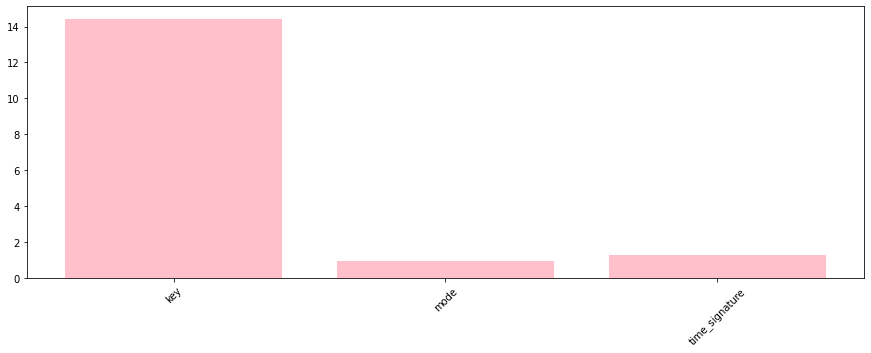

In [59]:
#Define 3 categoric feature
X_cat3 =cat_df[["key","mode","time_signature"]]

#Define Feature Selection with Chi-Square approach
fs_cat = SelectKBest(score_func=chi2, k='all')

#Apply categorical feature selection to Training Data
X_features_cat = fs_cat.fit_transform(X_cat3, df['Genre'])

# what are scores for the features
for col in list(X_cat3.columns):
  score = fs_cat.scores_[X_cat3.columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

#barplot
plt.figure(figsize=(15,5));
plt.bar([col for col in list(X_cat3.columns)], fs_cat.scores_ , color="pink");
plt.xticks(rotation=45);
plt.show()


Above information represent the correlation via Chi-Square approach between our categorical features with the target. High score of Chi-Square of features means it has high relation/correlation with the target. 

So in this case, we will choose only 1 top features that has high correlation with Genre to be used in our model :
1. key

In [60]:
# Final Features
X_train = df[["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","key"]]
y_train = df["Genre"]

Now we have 11 X features for our modeling containcs column name :
("acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence","key")<br>

And our target is __Genre__.

### PreProcessing Pipeline

We've decided our feature attributes before. Now we're going to create pipeline to simplicity our modeling process. Our pipeline would contain some steps below :
1. Selecting predefined numeric attributes from dataset and scaling it using StandardScaler sklearn.
2. Combine scaled numeric attributes with categorical attributes. (In this context our categorical attributes are in numerical notation)

In [61]:
#PreProcess Final Pipeline
PrePipeline = FeatureUnion(
    transformer_list=[
        ("Numeric", Pipeline([ 
              ("SelectorNum", ColumnSelector(["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"])), #select numeric features
              ("Scaler", StandardScaler())  #scaling numeric features
        ])),
        ("Categoric", Pipeline([
              ("SelectorCat", ColumnSelector(["key"])) #select categorical feature
        ]))  
    ]
)

## Model Definition and Training

In this section, we will test several classification models and some combination of its own hyperparameter to find the best Model.

We will use gridSearchCV from sklearn for finding our best model /tunning it. In our gridsearch, we also using Cross Validation for train-test split , so we don't need split our dataset into train and eval set manually.

For test dataset, we're going to use test set from clustering section we've done before. The file called __testCluster.csv__



### Create Full GridSearch Pipeline and Defining Model

In this section we're going to create a pipeline that contains several models and define each combination of hyperparameter and also combine our previous pipeline preprocessing . 

After that, our full pipeline will be used for the GridSearchCV.

We're going to test classification models :
1. Logistic Regression (with hyperparameter combination C and solver)
2. SVC (with hyperparameter combination C and kernel)
3. Decision Tree (with hyperparamater combination max_depth)
4. Random Forest  (with hyperparamater combination max_depth and n_estimators)

In [62]:
#Full pipeline
pipeline = Pipeline([
    ("PreProcessing", PrePipeline), #call predefined preprocessing pipeline
    ("Classifier", PipelineHelper([
        ("Logistic", LogisticRegression(random_state=42, max_iter=1000)),
        ("SVC", SVC(random_state=42, probability=True)),
        ("DecisionTree", DecisionTreeClassifier(random_state=42)),
        ("RandomForest", RandomForestClassifier(random_state=42))
        ])
    )
])

#Define combination of each model's hyperparameter for GridSearchCV process
param= {
    'Classifier__selected_model': pipeline.named_steps["Classifier"].generate({
    'Logistic__C': [500,1000],
    'Logistic__solver':["lbfgs","liblinear"],
    'SVC__kernel':["rbf", "linear"],
    'SVC__C' : [500,1000],
    'DecisionTree__max_depth': [5,10],
    'RandomForest__max_depth': [5,10],
    'RandomForest__n_estimators' : [50,100]
    })
}

### Model Training and FineTunning with GridSearchCV

Here, firstly we need to defined scoring parameter which will be used as base calculation for GridSearchCV to find the best model. In this section we will use base scoring F1 Score for best model and also calculate another scoring for eval set test evaluation such as :
1. Precision
2. Recall
3. AUC Score

In [63]:
#define scoring matrics
scoring = {'F1': "f1_weighted", "Precision": "precision_weighted", "Recall":"recall_weighted", "AUC":"roc_auc_ovr_weighted"}

grid= GridSearchCV(pipeline, param_grid=param, cv=5, 
    scoring=scoring, refit="F1", error_score="raise")

Now we will train our dataset with gridsearch cv.

In [64]:
#Train dataset to find best model
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('PreProcessing',
                                        FeatureUnion(transformer_list=[('Numeric',
                                                                        Pipeline(steps=[('SelectorNum',
                                                                                         ColumnSelector(cols=['acousticness',
                                                                                                              'danceability',
                                                                                                              'duration_ms',
                                                                                                              'energy',
                                                                                                              'instrumentalness',
                                                                                         

## Model Evaluation

We've train some sever model and its own parameter. Now, we're going to find out the best model based on F1 Score evaluation from eval set in cross validation of GridSearchCV. It represents the harmonic value from Precision (ability model to predict true genre) and Recall (ability model to not predict a genre as another genre) value.

The best model is the one which has high value of F1Score and ROC Value score.

Firstly let's graph our gridsearch result.

In [65]:
#Collect gridsearchcv evaluation result into dataframe

mod = []
par = []
mean_f1 =[]
mean_prec =[]
mean_rec=[]
mean_auc = []

for i in range(len(grid.cv_results_['params'])):
    mod.append(grid.cv_results_['params'][i]['Classifier__selected_model'][0])
    par.append(str(grid.cv_results_['params'][i]['Classifier__selected_model'][1]))
    mean_f1.append(grid.cv_results_['mean_test_F1'][i])
    mean_prec.append(grid.cv_results_['mean_test_Precision'][i])
    mean_rec.append(grid.cv_results_['mean_test_Recall'][i])
    mean_auc.append(grid.cv_results_['mean_test_AUC'][i])

eval = pd.DataFrame({
    "Model": mod,
    "Parameter" : par,
    "Mean CV F1 Score": mean_f1,
    "Mean CV Precision": mean_prec,
    "Mean CV Recall": mean_prec,
    "Mean CV AUC Score" : mean_auc
})

eval["SubModel"] = eval["Model"]+ " "+ eval["Parameter"]

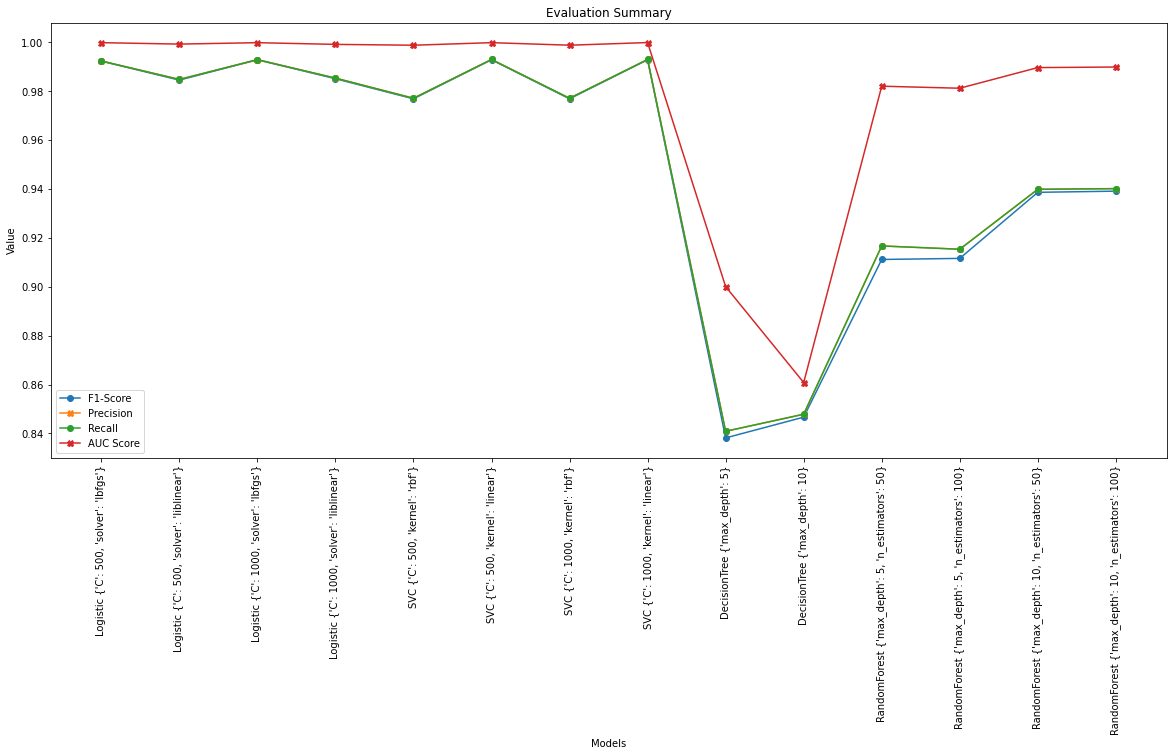

In [66]:
#Graph
plt.figure(figsize=(20,8))
plt.plot(eval["SubModel"],eval["Mean CV F1 Score"], marker="o", label="F1-Score")
plt.plot(eval["SubModel"],eval["Mean CV Precision"], marker="X", label="Precision")
plt.plot(eval["SubModel"],eval["Mean CV Recall"], marker="o", label="Recall")
plt.plot(eval["SubModel"],eval["Mean CV AUC Score"], marker="X", label="AUC Score")
plt.xlabel("Models")
plt.ylabel("Value")
plt.legend(loc="best")
plt.title("Evaluation Summary")
plt.xticks(rotation=90)
plt.show()


Intepretation :

From graph above we could see each combination of Logistic Regression and SVC has high AUC Score which means these models could separate the songs into right Genre well. It almost hit 100% which means a perfect value. From F1 score (blue line) which representing quality of our Precision and Recall , it seems has similar value with precision and recall to with high value above 90%. It means these model has 90% ability to predict right and not to predict wrongly.

On the other hand, Decision Tree and RandomForest has lower value of AUC score or F1 Score. It's value are vary between each hyperparameter.

We could conclude, our dataset is more fit with the model which using hyperplane or linear calculation as its basic (Logistic Regression and SVC) , meanwhile decision tree concept is not fit with our dataset. (Decision & RandomForest)


From above graph, we slightly we could see SVC (kernel linear , C=500) and SVC (kernel linear, C=1000) has the highest value from F1 Score, Precision, Recall and AUC Score. It means these model has high ability to predict the genre truly.

Let's check again with best_params from gridcvsearch.

In [67]:
#Get the best parameter
grid.best_params_

{'Classifier__selected_model': ('SVC', {'C': 500, 'kernel': 'linear'})}

Wow, from best params , SVC with kernel Linear and C=500 is the best model from the others. 
Below are the values of each evaluation of this model.

In [68]:
#check best model evaluation
eval[eval["SubModel"] == "SVC {'C': 500, 'kernel': 'linear'}" ]

,Model,Parameter,Mean CV F1 Score,Mean CV Precision,Mean CV Recall,Mean CV AUC Score,SubModel
5,SVC,"{'C': 500, 'kernel': 'linear'}",0.992839,0.992945,0.992945,0.999833,"SVC {'C': 500, 'kernel': 'linear'}"


We could conclude, this SVC model has almost 100% ability to predcit the Genre of songs with AUC Score = 0.9999.

### Final Model

We've running gridsearchcv and find out the best model. Here we will get the best estimator from gridsearch cv to variable bestModel.

In [69]:
#define bestmodel
bestModel = grid.best_estimator_

#train bestModel
bestModel.fit(X_train, y_train)

Pipeline(steps=[('PreProcessing',
                 FeatureUnion(transformer_list=[('Numeric',
                                                 Pipeline(steps=[('SelectorNum',
                                                                  ColumnSelector(cols=['acousticness',
                                                                                       'danceability',
                                                                                       'duration_ms',
                                                                                       'energy',
                                                                                       'instrumentalness',
                                                                                       'liveness',
                                                                                       'loudness',
                                                                                       'speechiness',
             

## Model Inference

In this section we will test our bestModel with testCluster.csv file.

In [70]:
#Load test set
test_df = pd.read_csv("dataset/testCluster.csv")
test_df.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,Genre
0,0.7480,0.520,341667,0.0748,0.633,8,0.102,-24.477,1,0.0497,107.327,4.0,0.134,The Man I Love,Marcus Roberts,2
1,0.0726,0.739,386907,0.5260,0.000,4,0.215,-7.384,0,0.1010,143.948,4.0,0.374,Money Trees,Kendrick Lamar,0


In [71]:
#Predict data
y_test_predict = bestModel.predict(test_df)

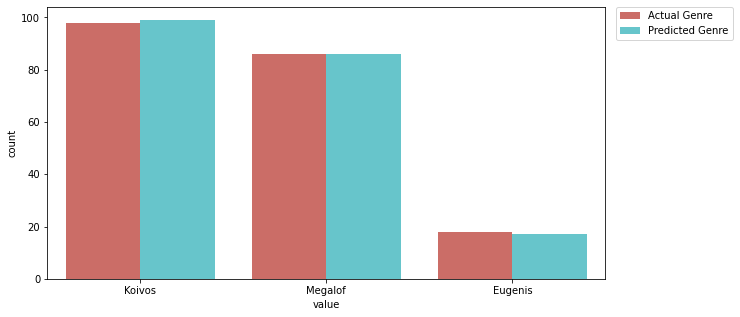

In [72]:
#Compare the true y vs predicted y
gr = pd.melt(pd.DataFrame({"Genre": test_df["Genre"].to_numpy(), "Predicted Genre": y_test_predict}))
plt.figure(figsize=(10,5));
g1 =sns.countplot(data=gr, x="value",  palette="hls", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 , labels=['Actual Genre', 'Predicted Genre'])
g1.set_xticklabels(['Koivos', 'Megalof', 'Eugenis'])
plt.show()


We could see, the portion of our predicted Genre against its actual Genre is are almost same in test set data. It was inline with our evaluation before that our model could predict truly almost 100%.

## Conclusion

1. We could see, from our a half of dataset mostly songs has Eugenis genre which mean a song with slow or calm vibe. While common genre song (Koivos) has 37% from data and the rest are Megalof which has strong vibes for ear.
2. Eugenis has highest average of acousticness while megalof is the lowest. It was inline since eugenis typically has calm music such as jazz and megalof has hard music such as rock or EDM. For common genre like Koivos it has fair acousticness.
3. The trend of valene from Eugenis Genre not always has low valence. There is song with high valence reached 0.8. It means Eugenis Genre not always has low valence, sometimes it could have high valence
4. Our dataset is more fit if using models classification which adapt linear / hyperplane concept as its basic. The best model of our dataset to classify is SVC with hyperparameter kernel linear and C=500. It could produce around 99% ability to predict the dataset truly.

## Additional Saving

In this section we're going to export our bestmodel with pickle so we could re-use it again later in deployment without building the model from scratch.

In [73]:
#Library used
import pickle

In [74]:
#save final best model
pickle.dump(bestModel, open('model/bestModel.pkl', 'wb'))